https://keras.io/examples/nlp/pretrained_word_embeddings/

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [57]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec,KeyedVectors

import logging
import nltk
from nltk.corpus import brown   
import os 

#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
nltk.download('brown')

import csv
import transformers
from scipy.spatial.distance import cosine
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
#% matplotlib inline

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
sentences = brown.sents()

def IsWordInBrownData(word):
	print(word)
	return [word] in brown.sents()

def CheckFourWordsInBrownData(words):
	for w in words:
		if IsWordInBrownData(w):
			print(w)
			return False
	return True

def GetPairs():
	word_pairs = []
	with open('DataFiles/PhraseData.csv', 'r') as file:
		for row in file:
			if 'Phrase1' in row.strip():continue #Skip heading
			words = row.split(" ")
			if CheckFourWordsInBrownData([words[0], words[2], words[1][:-1], words[3][:-1]]):
				word_pairs.append([words[0], words[2]])
				word_pairs.append([words[1][:-1], words[3][:-1]])
	return word_pairs
GetPairs()

In [163]:
# read the words from your WordData.csv file
def GetWords():
    words = []
    with open('DataFiles/WordData.csv', 'r') as f:       
        for line in f:
            if line.strip()=='Word':continue #Skip heading
            words.append(line.strip())
    return words

def GetWordPairs():
	words = []
	with open('DataFiles/PhraseData.csv', 'r') as f:  
		pair1, pair2 = [], []
		for line in f:
			if line.strip()=='Word':continue #Skip heading
			for phrase in f:
				phrase = phrase.split(" ")
				pair1.append([phrase[0], phrase[2]])
				pair1.append([phrase[1], phrase[3]])
		words.append([pair1])
	return words[0][0]

word_pairs = GetWordPairs()
print("First 5 Word Pairs: ")
print(word_pairs[:4])


words = GetWords()
print("\nFirst 5 Words: ")
words[0:5]

First 5 Word Pairs: 
[['development', 'action'], ['plan,', 'programme,'], ['training', 'education'], ['programme,', 'course,']]

First 5 Words: 


['development', 'plan', 'action', 'programme', 'training']

# Word2Vec

In [164]:
class W2VModel():
	def __init__(self, vector_dims, dir='C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'):
		self.vector_dims = vector_dims
		if not os.path.exists(dir+str(vector_dims)):
			self.model = gensim.models.Word2Vec(brown.sents(), min_count=1,vector_size=vector_dims, window=5, workers=4)
			self.model.save(dir+str(vector_dims))
		else:
			self.model = Word2Vec.load(dir+str(vector_dims))
		print("Made Word2Vec Model of ", str(vector_dims), " dimensions")
	
	def getvector(self, words):
		return self.model.wv[words]

dimensions = [10,20,30,40,50,60,70,80,90] + list(np.arange(100,800,100))

for vector_dims in dimensions: W2VModel(vector_dims)

W2V = W2VModel(768)
print("First 10 dims of second word in 768 dims: ")
W2V.getvector(words[1])[:10]

Made Word2Vec Model of  10  dimensions
Made Word2Vec Model of  20  dimensions
Made Word2Vec Model of  30  dimensions
Made Word2Vec Model of  40  dimensions
Made Word2Vec Model of  50  dimensions
Made Word2Vec Model of  60  dimensions
Made Word2Vec Model of  70  dimensions
Made Word2Vec Model of  80  dimensions
Made Word2Vec Model of  90  dimensions
Made Word2Vec Model of  100  dimensions
Made Word2Vec Model of  200  dimensions
Made Word2Vec Model of  300  dimensions
Made Word2Vec Model of  400  dimensions
Made Word2Vec Model of  500  dimensions
Made Word2Vec Model of  600  dimensions
Made Word2Vec Model of  700  dimensions
Made Word2Vec Model of  768  dimensions
First 10 dims of second word in 768 dims: 


array([-0.111239  , -0.11238351, -0.02475715,  0.07736997,  0.05225196,
       -0.10167263, -0.11997304, -0.03647869, -0.14775316,  0.01629074],
      dtype=float32)

## Testing

In [165]:
#Missing Words from Corupus
W2V = W2VModel(768)
word_pairs = GetWordPairs()
for pair in word_pairs:
	try:
		W2V.model.wv[pair]
	except:
		print(pair)
		word_pairs.remove(str(pair))

Made Word2Vec Model of  768  dimensions
['plan,', 'programme,']


ValueError: list.remove(x): x not in list

In [169]:
#Missing Words from Corupus
W2V = W2VModel(768)

W2V
print("Missing (removed) Words & Phrases:")
pairs = GetWordPairs()
for pair in pairs:

	try:
		W2V.model.wv[pair[0]]
		W2V.model.wv[pair[1]]
	except:
		W2V.model.wv[pair[0][:-1]]
		W2V.model.wv[pair[1][:-1]]

Made Word2Vec Model of  768  dimensions
Missing (removed) Words & Phrases:


KeyError: "Key 'programme' not present"

In [170]:
model_100 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(100))
model_600 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(600))
model_700 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
np.dot(model_100.wv[words[1]],model_100.wv[words[2]]), np.dot(model_600.wv[words[1]],model_600.wv[words[2]]), np.dot(model_700.wv[words[1]],model_700.wv[words[2]])

(20.451641, 20.383715, 20.330574)

In [171]:
dot_prds = []
for dims in dimensions:
	model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims))
	dim_dot_prod = []
	for pair in pairs:
		dim_dot_prod.append(cosine(model.wv[pair[0]],model.wv[pair[1]]))
	dot_prds.append(dim_dot_prod)
dot_prods = np.array(dot_prds)
dot_prods.shape

KeyError: "Key 'plan,' not present"

Text(0, 0.5, 'Percentage Change from current dimension to 700')

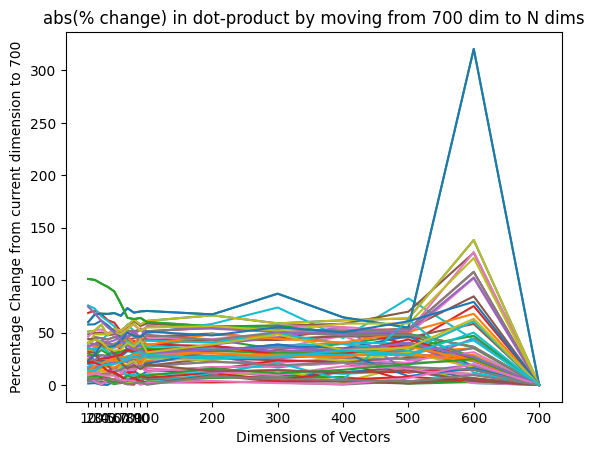

In [172]:
for word_dotprod in dot_prods.T:
	scaled_line = []
	for i, val in reversed(list(enumerate(word_dotprod))):
		try:
			if i == 0:
				scaled_line.append(val - val)
			else:
				scaled_line.append(100*abs((word_dotprod[0] - val)/word_dotprod[i-1]))
		except:
			pass
	plt.plot(dimensions, scaled_line)
plt.title("abs(% change) in dot-product by moving from 700 dim to N dims")
plt.xticks(dimensions)
plt.xlabel("Dimensions of Vectors")
plt.ylabel("Percentage Change from current dimension to 700")

# BERT

In [173]:
class BertEncodingWords():
	#https://colab.research.google.com/drive/1yFphU6PW9Uo6lmDly_ud9a6c4RCYlwdX#scrollTo=Zn0n2S-FWZih
	
	def __init__(self, data):
		# Load pre-trained model tokenizer (vocabulary)
		self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
		self.words = data
		self.model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True).eval()# output_hidden_states is whether the model returns all hidden-states. # Put the model in "evaluation" mode, meaning feed-forward operation. 
		pass
	
	def getWordEmbedding(self, word):
		marked_text = "[CLS] " + word + " [SEP]"
		tokenized_text = self.tokenizer.tokenize(marked_text)	# Tokenize our sentence with the BERT tokenizer.
		return(tokenized_text)	# Print out the tokens.
	
	def preprocessSentence(self, word):
		# Add the special tokens.
		tokenized_text = self.getWordEmbedding(word)
		# Map the token strings to their vocabulary indeces.
		indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

		# Mark each of the 22 tokens as belonging to sentence "1".
		segments_ids = [1] * len(tokenized_text)

		# Convert inputs to PyTorch tensors
		tokens_tensor = torch.tensor([indexed_tokens])
		segments_tensors = torch.tensor([segments_ids])
		return tokens_tensor, segments_tensors
	
	def hiddenLayersBERT(self, word):
		hidden_states = [] 
		with torch.no_grad():
			outputs = self.model(word[0])
			# https://huggingface.co/transformers/model_doc/bert.html#bertmodel
			hidden_states.append(outputs[2])
		return hidden_states

	def GetEmbeddingsForWord(self, hidden):
		# Stores the token vectors, with shape [22 x 768]
		token_vecs_sum = []

		# `token_embeddings` is a [22 x 12 x 768] tensor.

		# For each token in the sentence...
		for token in hidden:
			# `token` is a [12 x 768] tensor
			# Sum the vectors from the last four layers.
			sum_vec = torch.sum(token[0][0], dim=0)
			
			# Use `sum_vec` to represent `token`.
			token_vecs_sum.append(sum_vec)
		token_embedding_list = token_vecs_sum
		return token_embedding_list
	
	def GetTokenVecSum(self, hidden_state):
		# Stores the token vectors, with shape [22 x 768]
		token_vecs_cum_sum = []

		# `token_embeddings` is a [22 x 12 x 768] tensor.

		# For each token in the sentence...
		for token in hidden_state:

			# `token` is a [12 x 768] tensor
			# Sum the vectors from the last four layers.
			sum_vec = torch.sum(token[0][0], dim=0)
			
			# Use `sum_vec` to represent `token`.
			token_vecs_cum_sum.append(sum_vec)
		token_vecs_sum = token_vecs_cum_sum
		return token_vecs_sum

	def getWordVector(self, word):
		word_to_evaluate = self.preprocessSentence(word)
		hidden = self.hiddenLayersBERT(word_to_evaluate)
		embeddings = self.GetEmbeddingsForWord(hidden)
		return np.array(embeddings[0])

	
	def evaluateWordPair(self, row_numbers):
		sents_to_evaluate = [self.preprocessSentence(self.words[row_numbers[0]]), self.preprocessSentence(self.words[row_numbers[1]])]
		hidden = self.hiddenLayersBERT(sents_to_evaluate)
		embeddings = self.GetEmbeddingsForBothWords(hidden)
		return cosine(embeddings[1][0], embeddings[1][1])

	def evaluateAllSentPairs(self):
			res = []
			word_list = GetWords()
			for idx, word in enumerate(word_list):
				if idx % 2 == 0:
					try:
						res.append(1 - cosine(self.getWordVector(word), self.getWordVector(word_list[idx+1])))
					except:
						continue
				else:
					continue
			return res
	
	def GetAllBERTVectors(self):
		res = []
		word_list = GetWords()
		for idx, word in enumerate(word_list):
			try:
				res.append(self.getWordVector(word))
			except:
				continue
		return res

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'Cosine Similarity')

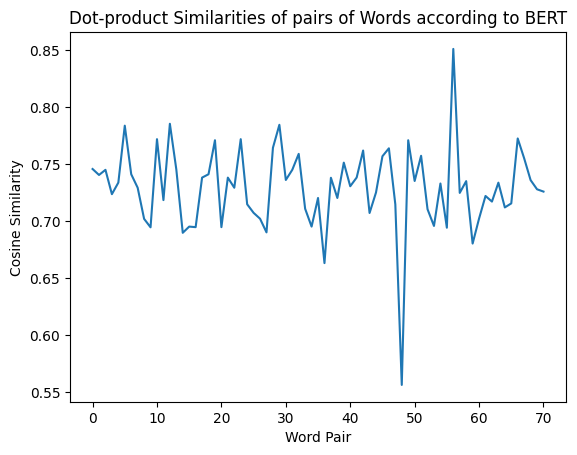

In [174]:
sentences = brown.sents()
bertWwords = BertEncodingWords(GetWords())

similarities = bertWwords.evaluateAllSentPairs()
plt.plot(similarities)
plt.title("Dot-product Similarities of pairs of Words according to BERT")
plt.xlabel("Word Pair")
plt.ylabel("Cosine Similarity")

# Rotations

In [178]:
def RotateWordVector(input_word_vector):
	rotated_word_vector = []
	for comaprison_word in words:
		try:
			if word == comaprison_word: continue
			else:rotated_word_vector.append(1-cosine(input_word_vector, W2V.getvector(comaprison_word)))
		except:
			#rotated_word_vector.append(0)
			continue
	return rotated_word_vector

W2V = W2VModel(768)
rotated_words = dict()
for word in words:
	try:
		rotated_word_vector = []
		rotated_word_vector = RotateWordVector(W2V.getvector(word))
		normalized_rotated_vector = np.array(rotated_word_vector)-np.array(rotated_word_vector).mean()
		scaled_normalized_rotated_vector = np.interp(normalized_rotated_vector, (normalized_rotated_vector.min(), normalized_rotated_vector.max()), (-1, +1))
		rotated_words.update({str(word): scaled_normalized_rotated_vector})
	except:
		continue
	

Made Word2Vec Model of  768  dimensions


In [179]:
word = 'board'
comaprison_word = 'market'
1-cosine(W2V.getvector(word), W2V.getvector(comaprison_word)), 1-cosine(rotated_words[word], rotated_words[comaprison_word]), len(rotated_words['board']),len(rotated_words['market']) 

(0.9227846264839172, 0.9584120509543789, 137, 137)

In [180]:
len(rotated_words['board']),len(rotated_words['market']) 

(137, 137)

In [181]:
list(rotated_words.keys())[0]

'development'

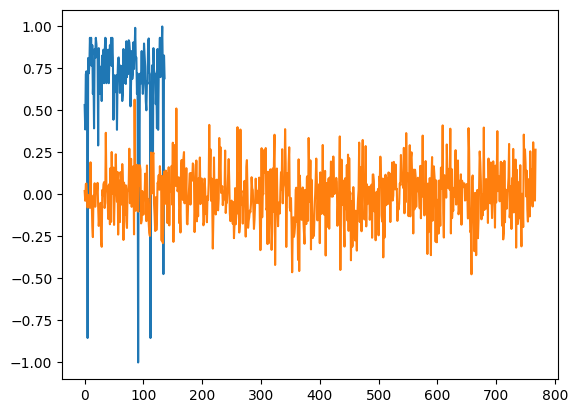

In [183]:
def evaluateSimilaritiesOfMethods():
	res = []
	for idx, word in enumerate(rotated_words.keys()):
		if idx % 2 == 0:
			next_word_idx = idx+1
			next_word = list(rotated_words.keys())[next_word_idx]
			#print(rotated_words[word], rotated_words[next_word])
			try:
				#print(rotated_words[word], rotated_words[next_word])
				res.append(1 - cosine(rotated_words[word], rotated_words[next_word]))
			except:
				continue
		else:
			continue
	return res
			
rotated_similatities = evaluateSimilaritiesOfMethods()
plt.plot(rotated_words[word])
plt.plot(W2V.getvector(word))

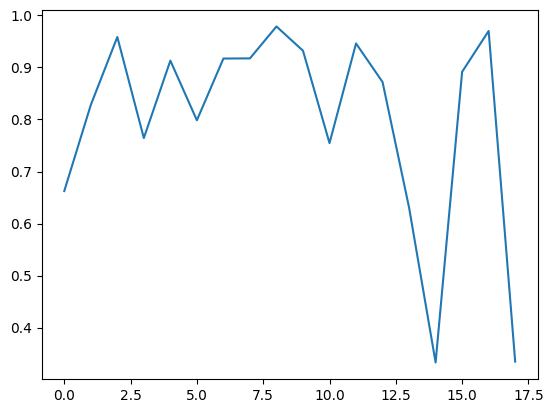

In [184]:
plt.plot(rotated_similatities)

# Single Value Decomposition

https://en.wikipedia.org/wiki/Singular_value_decomposition#:~:text=equivalent%20to%20zero.-,Low%2Drank%20matrix%20approximation,-%5Bedit%5D

In [185]:
def PerformSVD(A, N):
    # Perform SVD on the input vector
    U, D, Vt = np.linalg.svd(A)
    print(U.shape, D.shape, Vt.shape)
    # Select the first N columns of the U matrix
    U_reduced = U[:, :N]
    # Multiply the reduced U matrix with the S matrix
    A_reduced = np.dot(U_reduced, np.diag(D))
    return A_reduced

PerformSVD(np.array([[2,3, 9, 9, 9, 34,5, 4,5,6,44,5,6,4,3,9]]),1)

(1, 1) (1,) (16, 16)


array([[-60.14149982]])

In [186]:
from sklearn.decomposition import PCA

def DimReduceByPCA(input_array, new_dims):
	pca = PCA(n_components = new_dims)
	pca.fit(input_array)
	data_pca = pca.transform(input_array)
	return data_pca

In [187]:
bertWwords = BertEncodingWords(GetWords())
bertVectors = np.array(bertWwords.GetAllBERTVectors())
bertVectors.shape

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(143, 768)

In [188]:
reduced_BERT_vec = DimReduceByPCA(bertVectors, 9)
cosine(reduced_BERT_vec[0], reduced_BERT_vec[1]), cosine(bertVectors[0], bertVectors[1])

(0.6153202056884766, 0.2544633746147156)

# Autoencoder (Symetric & Deep)

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoding_dim = 15 
input_img = Input(shape=(768,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded1 = Dense(768, activation='sigmoid')(encoded)
decoded2 = Dense(384, activation='sigmoid')(encoded)
decoded3 = Dense(96, activation='sigmoid')(encoded)
decoded4 = Dense(20, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, [decoded1, decoded2, decoded3, decoded4])

# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
x_train = bertVectors
x_train.shape

(143, 768)

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
print(x_train.shape)

(143, 768)


In [ ]:
x_test.shape[1:]

(784,)

# Evaluation: Similarities in Methods

In [191]:
sentences = brown.sents()
BERT = BertEncodingWords(GetWords())
W2V = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))

BERT_dots = dict()
W2V_dots = dict()
ROTATED_dots = dict()
for pair in word_pairs:
	try:#Try accept as some words do not work in the W2V eg:W2V.wv['plan'] -> Error
		ROTATED_dots.update({pair[0]+" "+pair[1]:1 - cosine(rotated_words[pair[0]], rotated_words[pair[1]])})
		W2V_dots.update({pair[0]+" "+pair[1]:1 - cosine(W2V.getvector(pair[0]), W2V.getvector(pair[1]))})
		BERT_dots.update({pair[0]+" "+pair[1]:1 - cosine(BERT.getWordVector(pair[0]), BERT.getWordVector(pair[1]))})
		#print(pair[0], pair[1], len(BERT_dots), len(W2V_dots), np.round(W2V_dots[pair[0]+" "+pair[1]], 2), np.round(BERT_dots[pair[0]+" "+pair[1]], 2))
	except:continue#print(pair)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


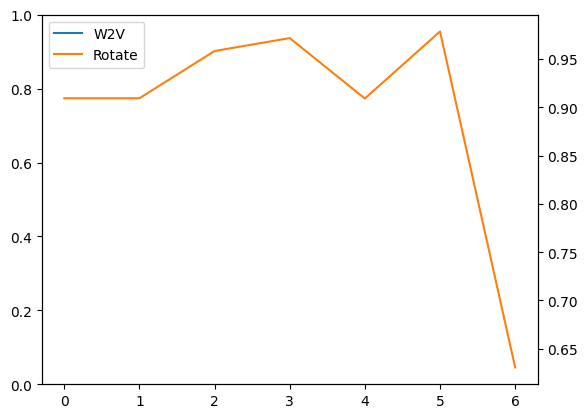

In [198]:
fig, ax = plt.subplots()

plt.plot(BERT_dots.values(), color='g', label = 'BERT')
ax2 = ax.twinx()
ax2.plot(W2V_dots.values(), label = 'W2V')
ax2.plot(ROTATED_dots.values(), label = 'Rotate')
plt.legend()
plt.show()